## Identify a set of cases with expression, mutation, and imaging data

This notebook demonstrates how to find the subset of cases with a given cancer type, in this case kidney cancer, that have available RNA expression, somatic mutation, and pathology data.

In [83]:
from cdapython import Q, columns, unique_terms
import cdapython
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
print(cdapython.__file__)
print(cdapython.__version__)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cdapython/__init__.py
2022.3.22


In [13]:
from ipywidgets import Dropdown
from IPython.display import display
tester_check = Dropdown(
    options=[True,False],
    description='Tester:',
    value=True,
)
display(tester_check)

Dropdown(description='Tester:', options=(True, False), value=True)

In [14]:
if(tester_check.value): Q.set_host_url("http://35.192.60.10:8080/")
else: Q.set_host_url("https://cda.cda-dev.broadinstitute.org")

print(Q.get_host_url())

http://35.192.60.10:8080/


## Identifying cases with desired data types
This notebook demonstrates how to navigate the CDA API to identify cases that have desired data types. First we use the `columns()` function with the files flag to query the available fields in the CDA files table.

In [15]:
columns(files=True)

['id',
 'identifier',
 'identifier.system',
 'identifier.value',
 'label',
 'data_category',
 'data_type',
 'file_format',
 'associated_project',
 'drs_uri',
 'byte_size',
 'checksum',
 'data_modality',
 'imaging_modality',
 'dbgap_accession_number',
 'Subject',
 'Subject.id',
 'Subject.identifier',
 'Subject.identifier.system',
 'Subject.identifier.value',
 'Subject.species',
 'Subject.sex',
 'Subject.race',
 'Subject.ethnicity',
 'Subject.days_to_birth',
 'Subject.subject_associated_project',
 'Subject.vital_status',
 'Subject.age_at_death',
 'Subject.cause_of_death',
 'ResearchSubject',
 'ResearchSubject.id',
 'ResearchSubject.identifier',
 'ResearchSubject.identifier.system',
 'ResearchSubject.identifier.value',
 'ResearchSubject.member_of_research_project',
 'ResearchSubject.primary_diagnosis_condition',
 'ResearchSubject.primary_diagnosis_site',
 'ResearchSubject.Diagnosis',
 'ResearchSubject.Diagnosis.id',
 'ResearchSubject.Diagnosis.identifier',
 'ResearchSubject.Diagnosis.iden

With the set of fields we cna begin exploring the of the "data_type" and "data_category" fields. We'll use the `unique_terms()` function with the files flag to get the set of values contained. 

In [16]:
unique_terms('data_type', files=True)

[None,
 'Aggregated Somatic Mutation',
 'Aligned Reads',
 'Allele-specific Copy Number Segment',
 'Annotated Somatic Mutation',
 'Biospecimen Supplement',
 'Clinical Supplement',
 'Copy Number Segment',
 'Differential Gene Expression',
 'Gene Expression Quantification',
 'Gene Level Copy Number',
 'Gene Level Copy Number Scores',
 'Isoform Expression Quantification',
 'Masked Annotated Somatic Mutation',
 'Masked Copy Number Segment',
 'Masked Intensities',
 'Masked Somatic Mutation',
 'Methylation Beta Value',
 'Open Standard',
 'Proprietary',
 'Protein Expression Quantification',
 'Raw CGI Variant',
 'Raw Simple Somatic Mutation',
 'Single Cell Analysis',
 'Slide Image',
 'Splice Junction Quantification',
 'Structural Rearrangement',
 'Text',
 'Transcript Fusion',
 'Web',
 'miRNA Expression Quantification']

In [17]:
unique_terms('data_category', files=True)

['Biospecimen',
 'Clinical',
 'Combined Nucleotide Variation',
 'Copy Number Variation',
 'DNA Methylation',
 'Imaging',
 'Peptide Spectral Matches',
 'Processed Mass Spectra',
 'Protein Assembly',
 'Proteome Profiling',
 'Quality Metrics',
 'Raw Mass Spectra',
 'Sequencing Reads',
 'Simple Nucleotide Variation',
 'Somatic Structural Variation',
 'Structural Variation',
 'Transcriptome Profiling']

### Subsetting by the data_category field
Both of these fields contain the information we need at different granularities. We will begin subsetting based on the data_category field. As the title states we will be looking for cases that have gene expression, somatic mutation, and slide files available.
Note that these are large queries and running the cells that retrieve all the results may take a while.

In [18]:
q1 = Q('data_type = "Gene Expression Quantification"')
q2 = Q('data_type = "Masked Somatic Mutation"')
q3 = Q('data_type = "Slide Image"')

Getting results from database


            QueryID: c61b7559-fb70-4829-801c-186b5caa766c
            Query:SELECT all_v3_0_Files.* FROM gdc-bq-sample.dev.all_v3_0_Files AS all_v3_0_Files WHERE (UPPER(all_v3_0_Files.data_type) = UPPER('Gene Expression Quantification'))
            Offset: 0
            Count: 100
            Total Row Count: 59925
            
            More pages: True
        


In [60]:
r1 = q1.files(filter='Subject.identifier.value', limit=500)
r1.pretty_print()

Getting results from database

{
    "Subject_identifier_value": "ASCProject_0003"
}
{
    "Subject_identifier_value": "MBCProject_0004"
}
{
    "Subject_identifier_value": "MBCProject_0209"
}
{
    "Subject_identifier_value": "MBCProject_0217"
}
{
    "Subject_identifier_value": "MBCProject_0573"
}
{
    "Subject_identifier_value": "MBCProject_2289"
}
{
    "Subject_identifier_value": "MBCProject_2991"
}
{
    "Subject_identifier_value": "MBCProject_3216"
}
{
    "Subject_identifier_value": "MBCProject_3717"
}
{
    "Subject_identifier_value": "MBCProject_3808"
}
{
    "Subject_identifier_value": "MBCProject_4232"
}
{
    "Subject_identifier_value": "MBCProject_4733"
}
{
    "Subject_identifier_value": "MBCProject_5799"
}
{
    "Subject_identifier_value": "01BR033"
}
{
    "Subject_identifier_value": "01BR033"
}
{
    "Subject_identifier_value": "01OV039"
}
{
    "Subject_identifier_value": "01OV039"
}
{
    "Subject_identifier_value": "04OV008"
}
{
    "Subject_identifier_value": "04

In [61]:
r2 = q2.files(filter='Subject.identifier.value', limit=500)
print(r2)

Getting results from database


            QueryID: b9f1fc6d-6542-4790-81c6-511553473777
            Query:SELECT _Subject_identifier.value AS Subject_identifier_value FROM gdc-bq-sample.dev.all_v3_0_Files AS all_v3_0_Files, UNNEST(all_v3_0_Files.Subject) AS _Subject, UNNEST(_Subject.identifier) AS _Subject_identifier WHERE (UPPER(all_v3_0_Files.data_type) = UPPER('Masked Somatic Mutation'))
            Offset: 0
            Count: 500
            Total Row Count: 55348
            
            More pages: True
        


In [62]:
r3 = q3.files(filter='Subject.identifier.value', limit=500)
print(r3)

Getting results from database


            QueryID: b88a6893-a18c-466d-8f69-6ae8440eba1e
            Query:SELECT _Subject_identifier.value AS Subject_identifier_value FROM gdc-bq-sample.dev.all_v3_0_Files AS all_v3_0_Files, UNNEST(all_v3_0_Files.Subject) AS _Subject, UNNEST(_Subject.identifier) AS _Subject_identifier WHERE (UPPER(all_v3_0_Files.data_type) = UPPER('Slide Image'))
            Offset: 0
            Count: 500
            Total Row Count: 36747
            
            More pages: True
        


### Compile the results of our queries
The results objects we have are paginated, to get a complete set we iterate over the pages and concatenate them into a single list. We have provided a function for this below.

In [63]:
def iter_pages(result):
    df = result.to_dataframe()
    while result.has_next_page:
        result = result.next_page()
        df = pd.concat([df, result.to_dataframe()])
    return df

In [64]:
# this cell requires more time to execute than usual
df1 = iter_pages(r1)
df1.head()
#df2 = iter_pages(r2)
#df3 = iter_pages(r3)

In [ ]:
df2 = iter_pages(r2)

In [ ]:
df3 = iter_pages(r3)

### Perform a set operation to identify cases present in all 3 results
We can utilize python sets to find the overlap of our 3 results, this will give us the set of all cases that have some form of gene expression, somatic mutation, and slide files available.

In [65]:
df1.head(3)

,Subject_identifier_value
0,ASCProject_0003
1,MBCProject_0004
2,MBCProject_0209


In [67]:
identifier_set = set(df1['Subject_identifier_value']).intersection(df2['Subject_identifier_value'])
identifier_set = identifier_set.intersection(df3['Subject_identifier_value'])
len(identifier_set)

9610

### Retrieve information about the cases
With these 9610 case ids we can query the default CDA database to retrieve the broader information of each case. We can pass the ids into the query with a simple list comprehension and a string format.

In [75]:
list_of_ids = ','.join([f'"{x}"' for x in identifier_set])
q_final = Q(f'id IN [{list_of_ids}]')
r_final = q_final.run()
r_final

Getting results from database

Total execution time: 6885 ms



            QueryID: 9cf0fa4f-bf8a-43f0-a056-5b28c3fb56b6
            Query:SELECT all_v3_0_subjects_meta.* FROM gdc-bq-sample.dev.all_v3_0_subjects_meta AS all_v3_0_subjects_meta WHERE (UPPER(all_v3_0_subjects_meta.id) IN ('TCGA-D7-6527','TCGA-BJ-A191','TCGA-BC-A10R','TCGA-43-5668','TCGA-V1-A8WV','TCGA-AN-A0AL','TCGA-3B-A9HY','TCGA-N6-A4VG','TCGA-QQ-A8VG','TCGA-2G-AAHL','TCGA-ER-A2NB','TCGA-DX-A48L','TCGA-56-8626','TCGA-QK-A6IF','TCGA-ZB-A96V','TCGA-PK-A5H9','TCGA-G6-A8L6','TCGA-D7-A6EX','TCGA-NC-A5HF','TCGA-GN-A265','TCGA-DX-A6Z2','TCGA-YL-A9WL','TCGA-CH-5744','TCGA-25-1322','TCGA-ER-A3EV','TCGA-4Z-AA7Q','TCGA-A8-A06Q','TCGA-CM-6171','TCGA-A5-A0G3','TCGA-27-1830','TCGA-BH-A0AU','TCGA-3U-A98G','TCGA-S8-A6BW','TCGA-DS-A7WI','TCGA-N5-A4RD','TCGA-GU-A42R','TCGA-AR-A0TT','TCGA-CV-5435','TCGA-CZ-5982','TCGA-CG-4465','TCGA-BC-A3KG','TCGA-IB-AAUW','TCGA-DY-A1H8','TCGA-X6-A7WD','TCGA-B9-A5W9','TCGA-XF-AAN0','TCGA-AG-A01N','TCGA-CZ-5458','TCGA-3N-A9WB','TCGA-TS-A7P1','TCGA-C8-A1HI','TCGA-5P-A

### Iterate over our table
We once again iterate across our results and concatenate the pages into a final data frame. From here we can further investigate the characteristics of the cases. As an example we'll look at the universe of associated projects, and plotting the age distribution.

In [77]:
# Similarly to above this cell takes longer to execute
df_final = iter_pages(r_final)
df_final.head()

,id,identifier,species,sex,race,ethnicity,days_to_birth,subject_associated_project,vital_status,age_at_death,cause_of_death,ResearchSubject
0,TCGA-92-8064,"[{'system': 'GDC', 'value': 'TCGA-92-8064'}, {...",Homo sapiens,male,white,not hispanic or latino,-21417,"[TCGA-LUSC, tcga_lusc]",Alive,None,None,[{'id': 'dc6ceece-efaa-4b9d-9e12-d35863d7a902'...
1,TCGA-BH-A0C0,"[{'system': 'GDC', 'value': 'TCGA-BH-A0C0'}, {...",Homo sapiens,female,white,not reported,-23006,"[TCGA-BRCA, CPTAC-TCGA, tcga_brca]",Alive,None,None,[{'id': '7875018b-91dc-4ab1-83b0-ee3883e2816e'...
2,TCGA-KN-8430,"[{'system': 'GDC', 'value': 'TCGA-KN-8430'}, {...",Homo sapiens,male,white,not hispanic or latino,-27467,"[TCGA-KICH, tcga_kich]",Dead,None,None,[{'id': '9f8aa332-e625-46f7-b77b-1fcb3ca99ee2'...
3,TCGA-KM-8441,"[{'system': 'GDC', 'value': 'TCGA-KM-8441'}, {...",Homo sapiens,female,white,not hispanic or latino,-22303,"[TCGA-KICH, tcga_kich]",Alive,None,None,[{'id': 'f31ba8ec-a3dd-4dd8-8d15-f6c5975ebe44'...
4,TCGA-50-5946,"[{'system': 'GDC', 'value': 'TCGA-50-5946'}, {...",Homo sapiens,male,white,not reported,-22852,"[TCGA-LUAD, tcga_luad]",Alive,None,None,[{'id': 'c95957a7-1a1a-4c8d-bb61-7c99b500f224'...


In [81]:
projects = [x.upper() for y in df_final['subject_associated_project'] for x in y]
set(projects)

{'CPTAC-TCGA',
 'TCGA-ACC',
 'TCGA-BLCA',
 'TCGA-BRCA',
 'TCGA-CESC',
 'TCGA-CHOL',
 'TCGA-COAD',
 'TCGA-DLBC',
 'TCGA-ESCA',
 'TCGA-GBM',
 'TCGA-HNSC',
 'TCGA-KICH',
 'TCGA-KIRC',
 'TCGA-KIRP',
 'TCGA-LGG',
 'TCGA-LIHC',
 'TCGA-LUAD',
 'TCGA-LUSC',
 'TCGA-MESO',
 'TCGA-OV',
 'TCGA-PAAD',
 'TCGA-PCPG',
 'TCGA-PRAD',
 'TCGA-READ',
 'TCGA-SARC',
 'TCGA-SKCM',
 'TCGA-STAD',
 'TCGA-TGCT',
 'TCGA-THCA',
 'TCGA-THYM',
 'TCGA-UCEC',
 'TCGA-UCS',
 'TCGA-UVM',
 'TCGA_BLCA',
 'TCGA_BRCA',
 'TCGA_CESC',
 'TCGA_COAD',
 'TCGA_ESCA',
 'TCGA_GBM',
 'TCGA_HNSC',
 'TCGA_KICH',
 'TCGA_KIRC',
 'TCGA_KIRP',
 'TCGA_LGG',
 'TCGA_LIHC',
 'TCGA_LUAD',
 'TCGA_LUSC',
 'TCGA_OV',
 'TCGA_PRAD',
 'TCGA_READ',
 'TCGA_SARC',
 'TCGA_STAD',
 'TCGA_THCA',
 'TCGA_UCEC'}

(array([  78.,  239.,  455.,  721., 1181., 1710., 2025., 1701., 1010.,
         358.]),
 array([14.43013699, 21.99315068, 29.55616438, 37.11917808, 44.68219178,
        52.24520548, 59.80821918, 67.37123288, 74.93424658, 82.49726027,
        90.06027397]),
 <a list of 10 Patch objects>)

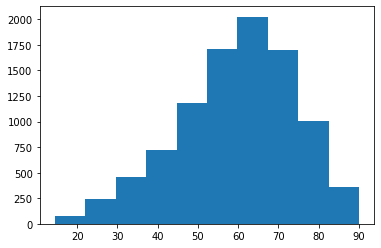

In [87]:
ages = [abs(int(x)/365) for x in df_final['days_to_birth'] if x]
plt.hist(ages)